In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# wczytywanie danych
dane_sz = []
with open("dane_wys_lab2.txt", 'r') as fi:
    for line in fi:
        if line.split():
            line = [float(x) for x in line.split()]
            dane_sz.append(line)


dane=[]
for item in dane_sz:
    for number in item:
        dane.append(number)

print(dane)

[142.2, 138.9, 140.3, 137.4, 143.1, 133.6, 141.8, 137.5, 154.5, 148.6, 146.0, 146.5, 136.7, 146.2, 149.6, 133.0, 151.2, 146.0, 147.0, 143.4, 142.0, 147.3, 139.5, 137.2, 146.6, 156.0, 141.4, 135.5, 142.1, 142.7, 149.6, 141.2, 139.1, 147.1, 140.4, 150.4, 145.3, 149.9, 150.8, 149.3, 150.3, 151.8, 142.4, 141.8, 157.0, 153.1, 129.8, 151.5, 155.2, 152.8, 146.0, 155.9, 147.5, 147.5, 148.7, 146.8, 148.7, 139.2, 137.5, 150.7, 144.8, 151.2, 143.0, 151.1, 148.7, 144.0, 152.8, 148.5, 137.4, 158.2]


In [3]:
# podstawowe dane do zbudowania szeregu rozdzielczego
min = np.min(dane)
max = np.max(dane)
n = len(dane)
rozstep = max-min
k_rob = round(n**0.5, 1)
print(min, max, n, k_rob)

129.8 158.2 70 8.4


In [4]:
# sesja robocza w celu ustalenia parametrów szeregu
k0 = 8 # podajemy tę wartość, żeby ostatecznie ustalić h i x01
h_rob = rozstep/k0
print(h_rob)
h0 = 3.5
 # podajemy tę wartość, żeby ostatecznie ustalić x01
x01_rob = (min - h0/2)
print(x01_rob)

3.549999999999997
128.05


In [5]:
# wyznaczanie szeregu rozdzielczego
def tworz_szereg(dane,  h, x01):
    max = np.max(dane)
    x11 = x01
    przedzialy = []
    liczebnosci = []
    zakresy = [x01]
    srodki = []
    while x11 < max:
        x11 = x01 + h
        n1 = len([x for x in dane if (x >= x01 and x < x11)])
        przedzialy.append([x01, x11])
        liczebnosci.append(n1)
        zakresy.append(x11)
        srodki.append((x01 + x11)/2)
        x01 = x11
    return przedzialy, liczebnosci, zakresy, srodki
    

In [6]:
#decyzja o wyborze parametrów, które będa stosowane do utworzenia szeregu
h = 3.5
x01 = 128
przedzialy, liczebnosci, zakresy, srodki = tworz_szereg(dane,  h, x01)
print(liczebnosci)
print(przedzialy)
print(zakresy)
print(srodki)

[1, 2, 7, 10, 11, 17, 13, 6, 3]
[[128, 131.5], [131.5, 135.0], [135.0, 138.5], [138.5, 142.0], [142.0, 145.5], [145.5, 149.0], [149.0, 152.5], [152.5, 156.0], [156.0, 159.5]]
[128, 131.5, 135.0, 138.5, 142.0, 145.5, 149.0, 152.5, 156.0, 159.5]
[129.75, 133.25, 136.75, 140.25, 143.75, 147.25, 150.75, 154.25, 157.75]


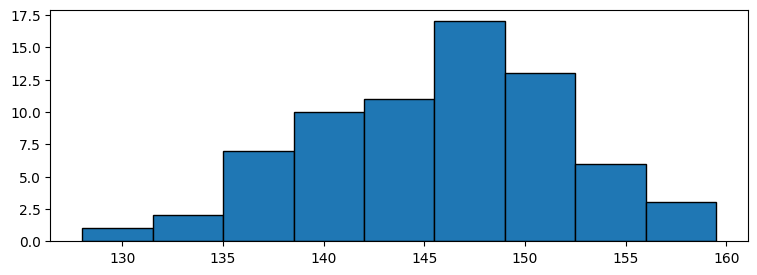

In [7]:
# tworzenie histogramu za pomoca metody plt.hist (niepotrzebne czestosci, plt.hist sam je wylicza)
plt.figure(figsize=(9, 3))
plt.hist(dane, bins=zakresy, edgecolor='black')
plt.show()

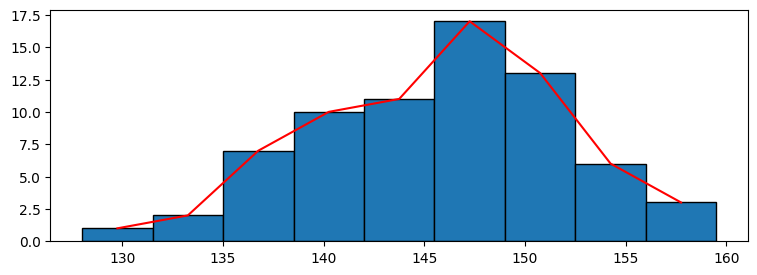

In [8]:
# rysowanie histogramu za pomoca metody plt.bar
plt.figure(figsize=(9, 3))
plt.bar(srodki, liczebnosci, width = h, edgecolor='black')
plt.plot(srodki, liczebnosci, color ='red')
plt.show()

In [9]:
# wyznaczanie szeregu skumulowanego
def wyznacz_skumulowany(liczebnosci):
    skumulowany = [liczebnosci[0]]
    for i in range(1, len(liczebnosci)):
        skumulowany.append(skumulowany[i-1]+liczebnosci[i])
    return skumulowany
skumulowany = wyznacz_skumulowany(liczebnosci)
print(skumulowany)

[1, 3, 10, 20, 31, 48, 61, 67, 70]


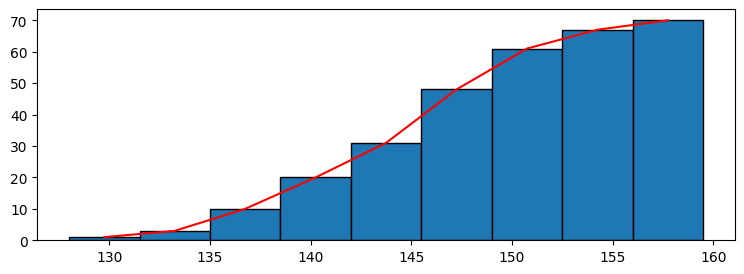

In [10]:
plt.figure(figsize=(9, 3))
plt.bar(srodki, skumulowany, width = h, edgecolor='black')
plt.plot(srodki, skumulowany, color ='red')
plt.show()

In [11]:
# wyznaczanie prawdopodobieństw empirycznych
pr_empiryczne = [x/n for x in liczebnosci]
print(pr_empiryczne)

[0.014285714285714285, 0.02857142857142857, 0.1, 0.14285714285714285, 0.15714285714285714, 0.24285714285714285, 0.18571428571428572, 0.08571428571428572, 0.04285714285714286]


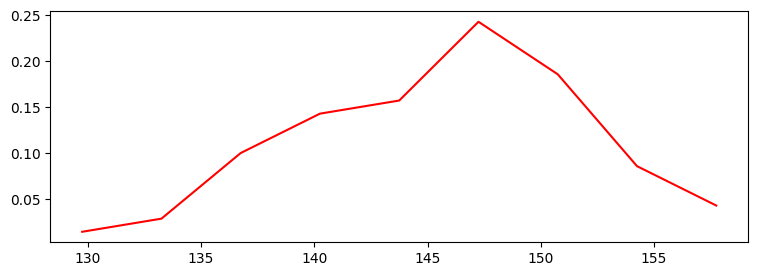

In [12]:
plt.figure(figsize=(9, 3))
plt.plot(srodki, pr_empiryczne, color ='red')
plt.show()

In [13]:
# wyznaczanie dystrybuanty empirycznej
dystr_empiryczna =  [x/n for x in skumulowany]
print(dystr_empiryczna)

[0.014285714285714285, 0.04285714285714286, 0.14285714285714285, 0.2857142857142857, 0.44285714285714284, 0.6857142857142857, 0.8714285714285714, 0.9571428571428572, 1.0]


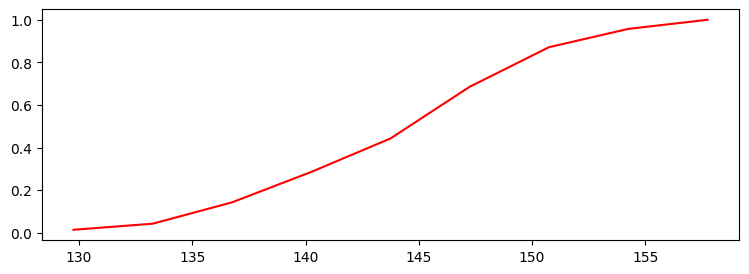

In [14]:
plt.figure(figsize=(9, 3))
plt.plot(srodki, dystr_empiryczna, color ='red')
plt.show()

In [15]:
# wyznaczanie średniej z szeregu
srednia_lista = [a*b for a,b in zip(srodki,liczebnosci)]
srednia = np.sum(srednia_lista)/n # średnia z szeregu
sr_p = np.mean(dane) # średnia z próby
blad_sr = abs(srednia-sr_p)/sr_p  # bład oszacowania sredniej
print(srednia) 
print(sr_p) 
print(blad_sr)


145.7
145.58285714285716
0.0008046473289631488


In [16]:
# wyznaczanie odchylenia standardowego z szeregu
kwadr_lista = [(x-srednia)**2 for x in srodki] 
war_lista = [a*b for a,b in zip(kwadr_lista,liczebnosci)]
wariancja = np.sum(war_lista)/n
#print(wariancja)
odch_stand = wariancja**0.5 # odchylenie standardowe z szeregu
std_p = np.std(dane)
blad_std = abs(odch_stand-std_p)/std_p
print(odch_stand)
print(std_p)
print(blad_std)

6.222740553807462
6.164691428462843
0.009416387830314026
